# K-Nearest Neighbors (K-En Yakın Komşu)

Ne demek ? 
* gözlemlerin birbirlerine olan benzerlikleri üzerinden tahmin yapılır
* bana arkadaşını söyle sana kim olduğunu söylim


* en küçük olan en yakın olacaktır 


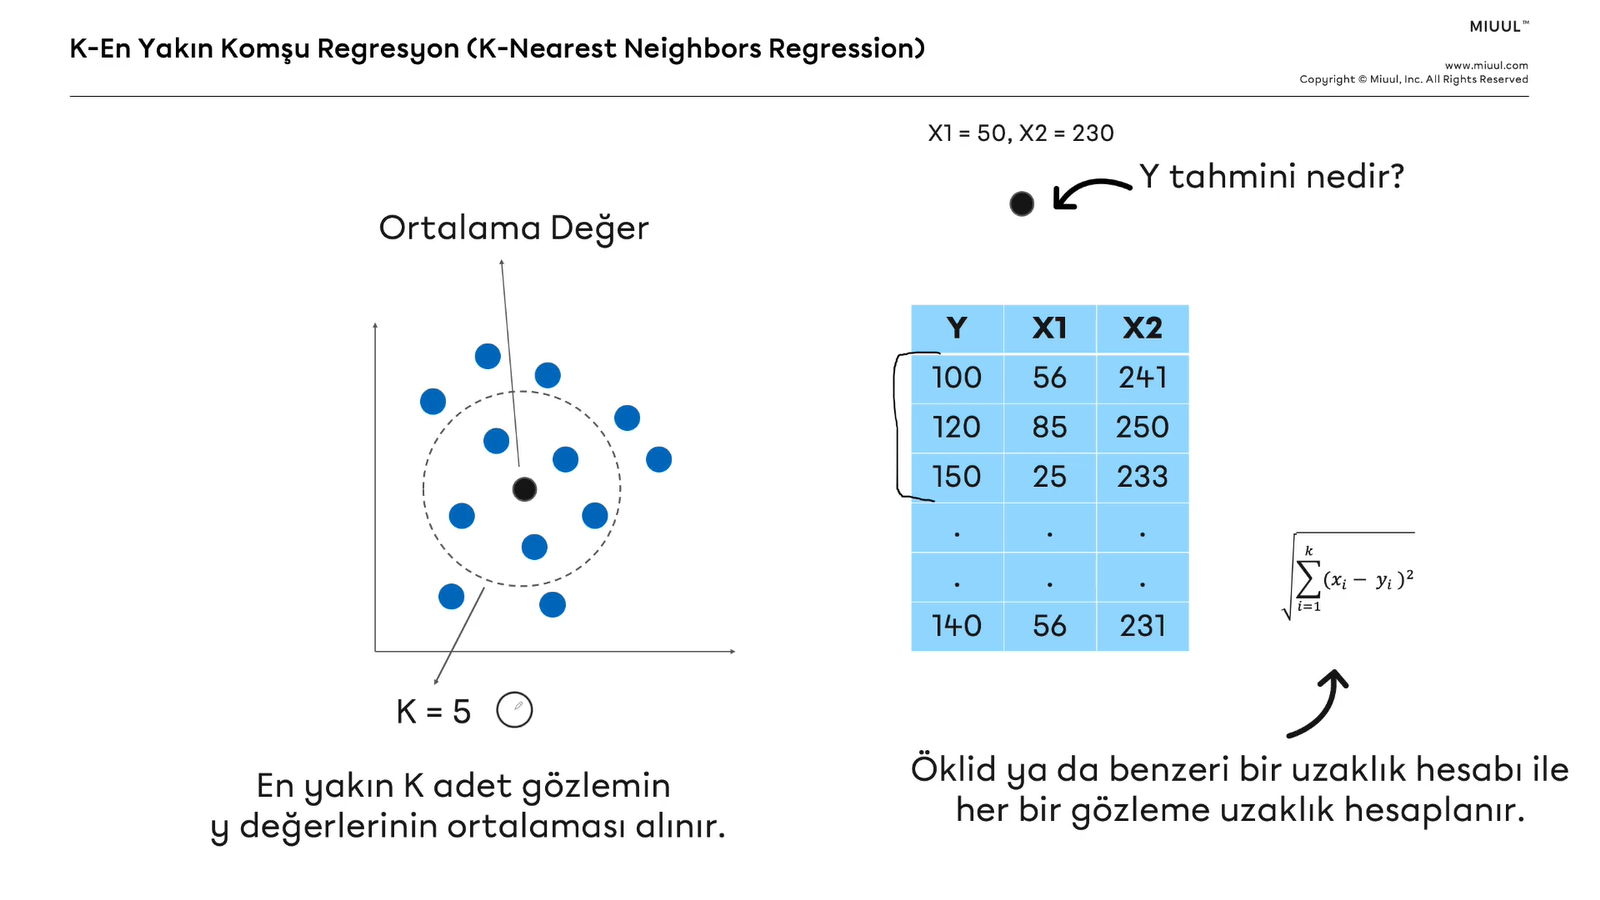

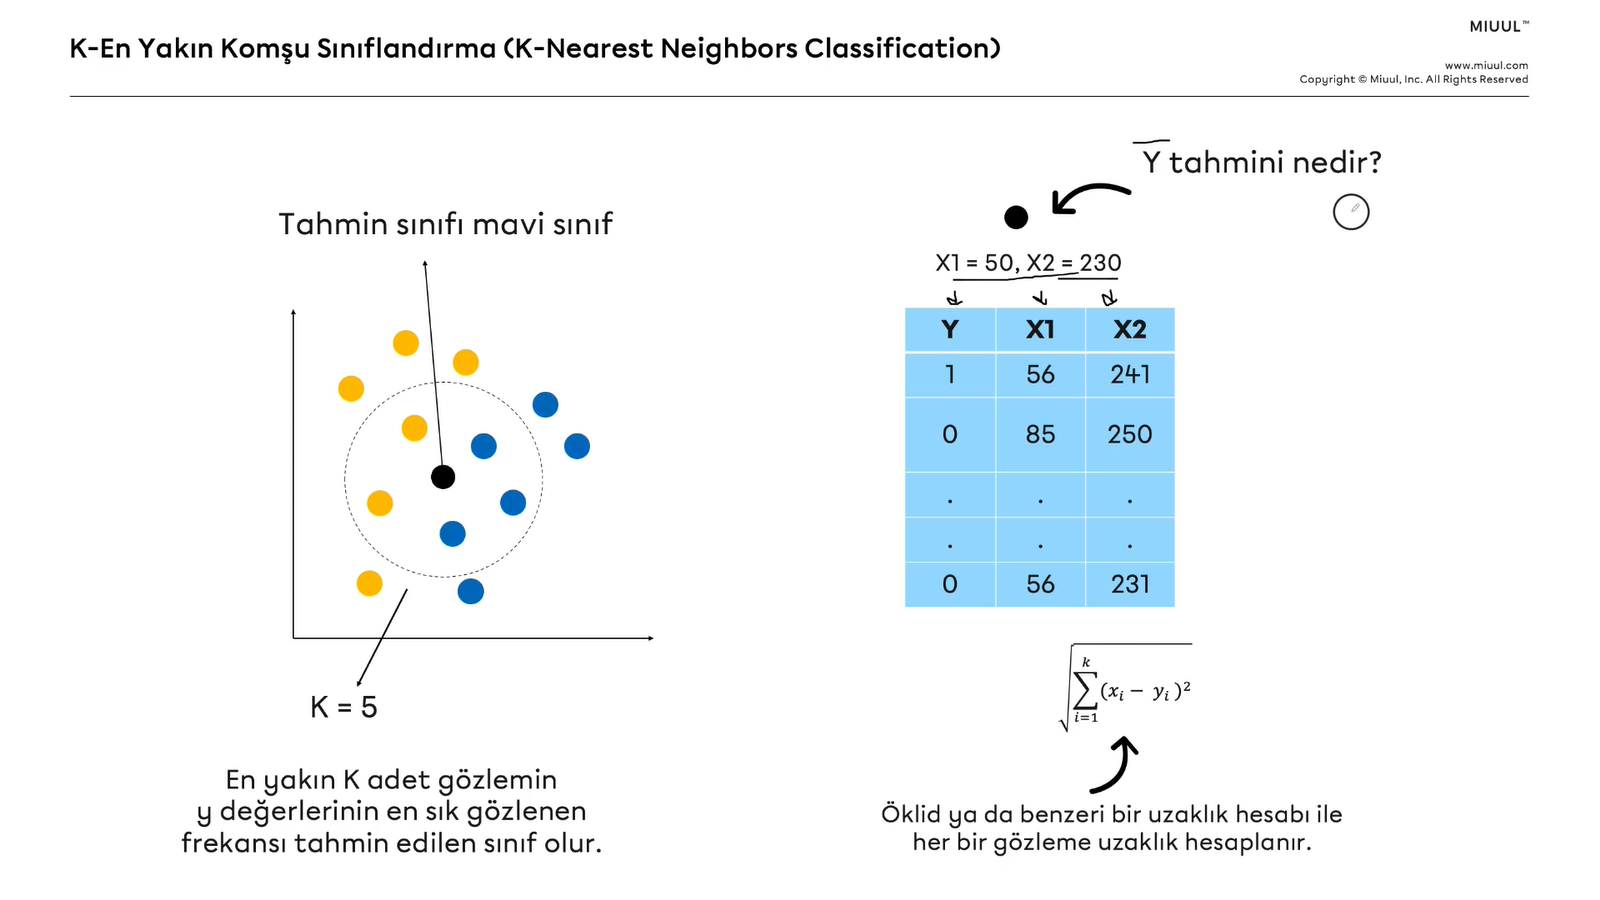

#####  KNN 

* 1.Exploratory Data Analysis 
* 2.Data Preprocessing & Feature Engineering
* 3.Modeling & Prediction 
* 4.Model Evaluation 
* 5.Hyperparameter Optimization 
* 6.Final Model

In [1]:
import pandas as pd 
from sklearn.metrics import classification_report,roc_auc_score 
from sklearn.model_selection import GridSearchCV, cross_validate 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 
pd.set_option('display.max_columns',None) 

#### 1.Exploratory Data Analysis

In [5]:
df = pd.read_csv("C:/Users/tolga/ML part 2/datasets/diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [9]:
def check_df(dataframe, head = 5):
    print("####################### shape ##########################")  
    
    print(dataframe.shape) 
    
    print("####################### types ##########################")   
    
    print(dataframe.dtypes) 

    print("####################### head ##########################")  
    
    print(dataframe.head) 

    
    print("####################### tail ##########################")  
    
    print(dataframe.tail)
    
    print("####################### NA ##########################")   
    
    print(dataframe.isnull().sum)

check_df(df) 

####################### shape ##########################
(768, 9)
####################### types ##########################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
####################### head ##########################
<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..       

In [12]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Data Preprocessing & Feature Engineering 

In [13]:
y = df["Outcome"] 
X = df.drop(["Outcome"], axis=1)

In [14]:
# standartlaşma yapmak verinin daha doğru/başarılı olmasını sağlayacaktır.

In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_scaled = StandardScaler().fit_transform(X)

In [20]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [21]:
# sütun isimlerini ekleme 

In [22]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [23]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


#### Modelling & Prediction

In [24]:
knn_model = KNeighborsClassifier().fit(X,y)

In [25]:
knn_model

KNeighborsClassifier()

In [26]:
#rastgele hasta seçip deneyelim

In [27]:
random_user = X.sample(1, random_state=45)

In [28]:
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,0.342981,1.161295,0.770014,1.283638,1.130518,0.940144,-0.232176,-0.360847


In [29]:
# diyabet olma durumu var mı yok mu ? 

knn_model.predict(random_user)


array([1], dtype=int64)

#### Model Evaluation(Model başarısı değerlendirme)

In [31]:
# tüm modeller için ,tahmin 
# confusion matrix için y_pred : 

y_pred = knn_model.predict(X)

In [32]:
# AUC ,ROC 

# AUC için y_pred : 
y_prob = knn_model.predict_proba(X)[:,1] 

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.79      0.70      0.74       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768



In [34]:
# accuracy %83 başarı oranımızdır 
# precision 1 olarak tahmin ettiklerimizin başarı oranı 
# recall gerçekte 1 olanları tahmin etme başarı oranı  
# f1 bunların harmonik ortalaması

In [36]:
# AUC 
roc_auc_score(y,y_prob)

0.9017686567164179

In [37]:
# modelin görmediği yerleri test etme 
# - holdout 
# - crossvalidation 

In [38]:
#crossvalidation 
# scoring : birden fazla sütuna bakmak için 
cv_result = cross_validate(knn_model, X ,y, cv=5, scoring=["accuracy","f1","roc_auc"])

In [39]:
cv_result

{'fit_time': array([0.0070219 , 0.00499821, 0.00652289, 0.00858545, 0.00752258]),
 'score_time': array([0.03505898, 0.0297308 , 0.032341  , 0.04329824, 0.03170609]),
 'test_accuracy': array([0.72077922, 0.73376623, 0.71428571, 0.77124183, 0.7254902 ]),
 'test_f1': array([0.58252427, 0.60952381, 0.54166667, 0.63917526, 0.58      ]),
 'test_roc_auc': array([0.77555556, 0.78759259, 0.73194444, 0.83226415, 0.77528302])}

In [44]:
# ortalamasını alalım 
# modeli doğrulamk için crossvalidate edilir
cv_result['test_accuracy'].mean() 
cv_result['test_f1'].mean() 
cv_result['test_roc_auc'].mean()

0.7805279524807827

In [41]:
cv_result['test_f1'].mean() 

0.5905780011534191

In [42]:
cv_result['test_accuracy'].mean()

0.733112638994992

In [43]:
cv_result['test_roc_auc'].mean()

0.7805279524807827

 Başarı nasıl arttırılabilir ? 
 * örnek boyutu arttırılabilir 
 * veri ön işleme  
 * özellik mühendisliği 
 * ilgili algoritma için optimizasyonlar yapılabilir 

In [45]:
# kullanıcı tarafından tanınması gereken dışardan tanınması gerekenlere "hiper parametre" denir . 

In [46]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### 5. Hyperparameter Optimization

In [48]:
# dışsal parametreler en uygun şekilde ayarlamamız lazım

In [49]:
knn_model = KNeighborsClassifier() 
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [50]:
knn_params = {"n_neighbors":range(2,50)}

In [51]:
knn_params

{'n_neighbors': range(2, 50)}

In [52]:
# belirlediğimiz n_neighborsları arayalım 
# n_jobs : en yüksek/hızlı şekilde sonuçlara gider 
# verbose : rapor istiyorsak kullanırız
knn_gs_best = GridSearchCV(knn_model,knn_params,cv=5,n_jobs=-1).fit(X,y)
knn_gs_best

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)})

In [53]:
knn_gs_best.best_params_

{'n_neighbors': 17}

#### Final Model 

In [58]:
# parametreyi bulduk ama gel tekrardan fit edilmesi gerek
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X,y)

In [59]:
knn_final

KNeighborsClassifier(n_neighbors=17)

In [62]:
# test hastasına bakalım ; crossvalidate 

cv_results = cross_validate(knn_final, 
                          X, 
                          y,
                          cv=5,
                          scoring=["accuracy","f1","roc_auc"]) 

cv_results['test_accuracy'].mean() 
cv_results['test_f1'].mean() 
cv_results['test_roc_auc'].mean()

0.8127938504542278

Başarı nasıl arttırılabilir ? 
 * örnek boyutu arttırılabilir 
 * veri ön işleme  
 * özellik mühendisliği 
 * ilgili algoritma için optimizasyonlar yapılabilir 

test edelim gerçekten doğru mu yaptık 

In [63]:
random_user = X.sample(1)

In [64]:
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
221,-0.547919,1.161295,1.0802,-1.288212,-0.692891,-0.049826,1.006073,2.787399


In [65]:
knn_final.predict(random_user)

array([0], dtype=int64)